In [5]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import scipy.stats as stats
import sklearn


In [7]:
# Load dataset
file_path = "/Users/andreapena/Desktop/regression_capstone/data/train.csv"
df = pd.read_csv(file_path)

# Check out dataset.
df.set_index("Id", inplace=True)
print(df.head())

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

In [9]:
# Feature to look at the amount of rows and columns.
df.shape

(1460, 80)

In [27]:
# Check null values
df.isnull().sum().sort_values(ascending=False)


PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [25]:
# Check data feature columns, count and dtypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [29]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [47]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [53]:
df['GrLivArea'] = df['GrLivArea'].fillna(df['GrLivArea'].mean())

In [55]:
df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].mean())

In [31]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [33]:
# Check if there are any missing values in numeric columns.
df.select_dtypes(include = 'number').isna().any


<bound method DataFrame.any of       MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
1          False        False    False        False        False      False   
2          False        False    False        False        False      False   
3          False        False    False        False        False      False   
4          False        False    False        False        False      False   
5          False        False    False        False        False      False   
...          ...          ...      ...          ...          ...        ...   
1456       False        False    False        False        False      False   
1457       False        False    False        False        False      False   
1458       False        False    False        False        False      False   
1459       False        False    False        False        False      False   
1460       False     

In [35]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print(correlation_matrix)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022895     0.193014  0.103960     0.410238    -0.127788   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808   

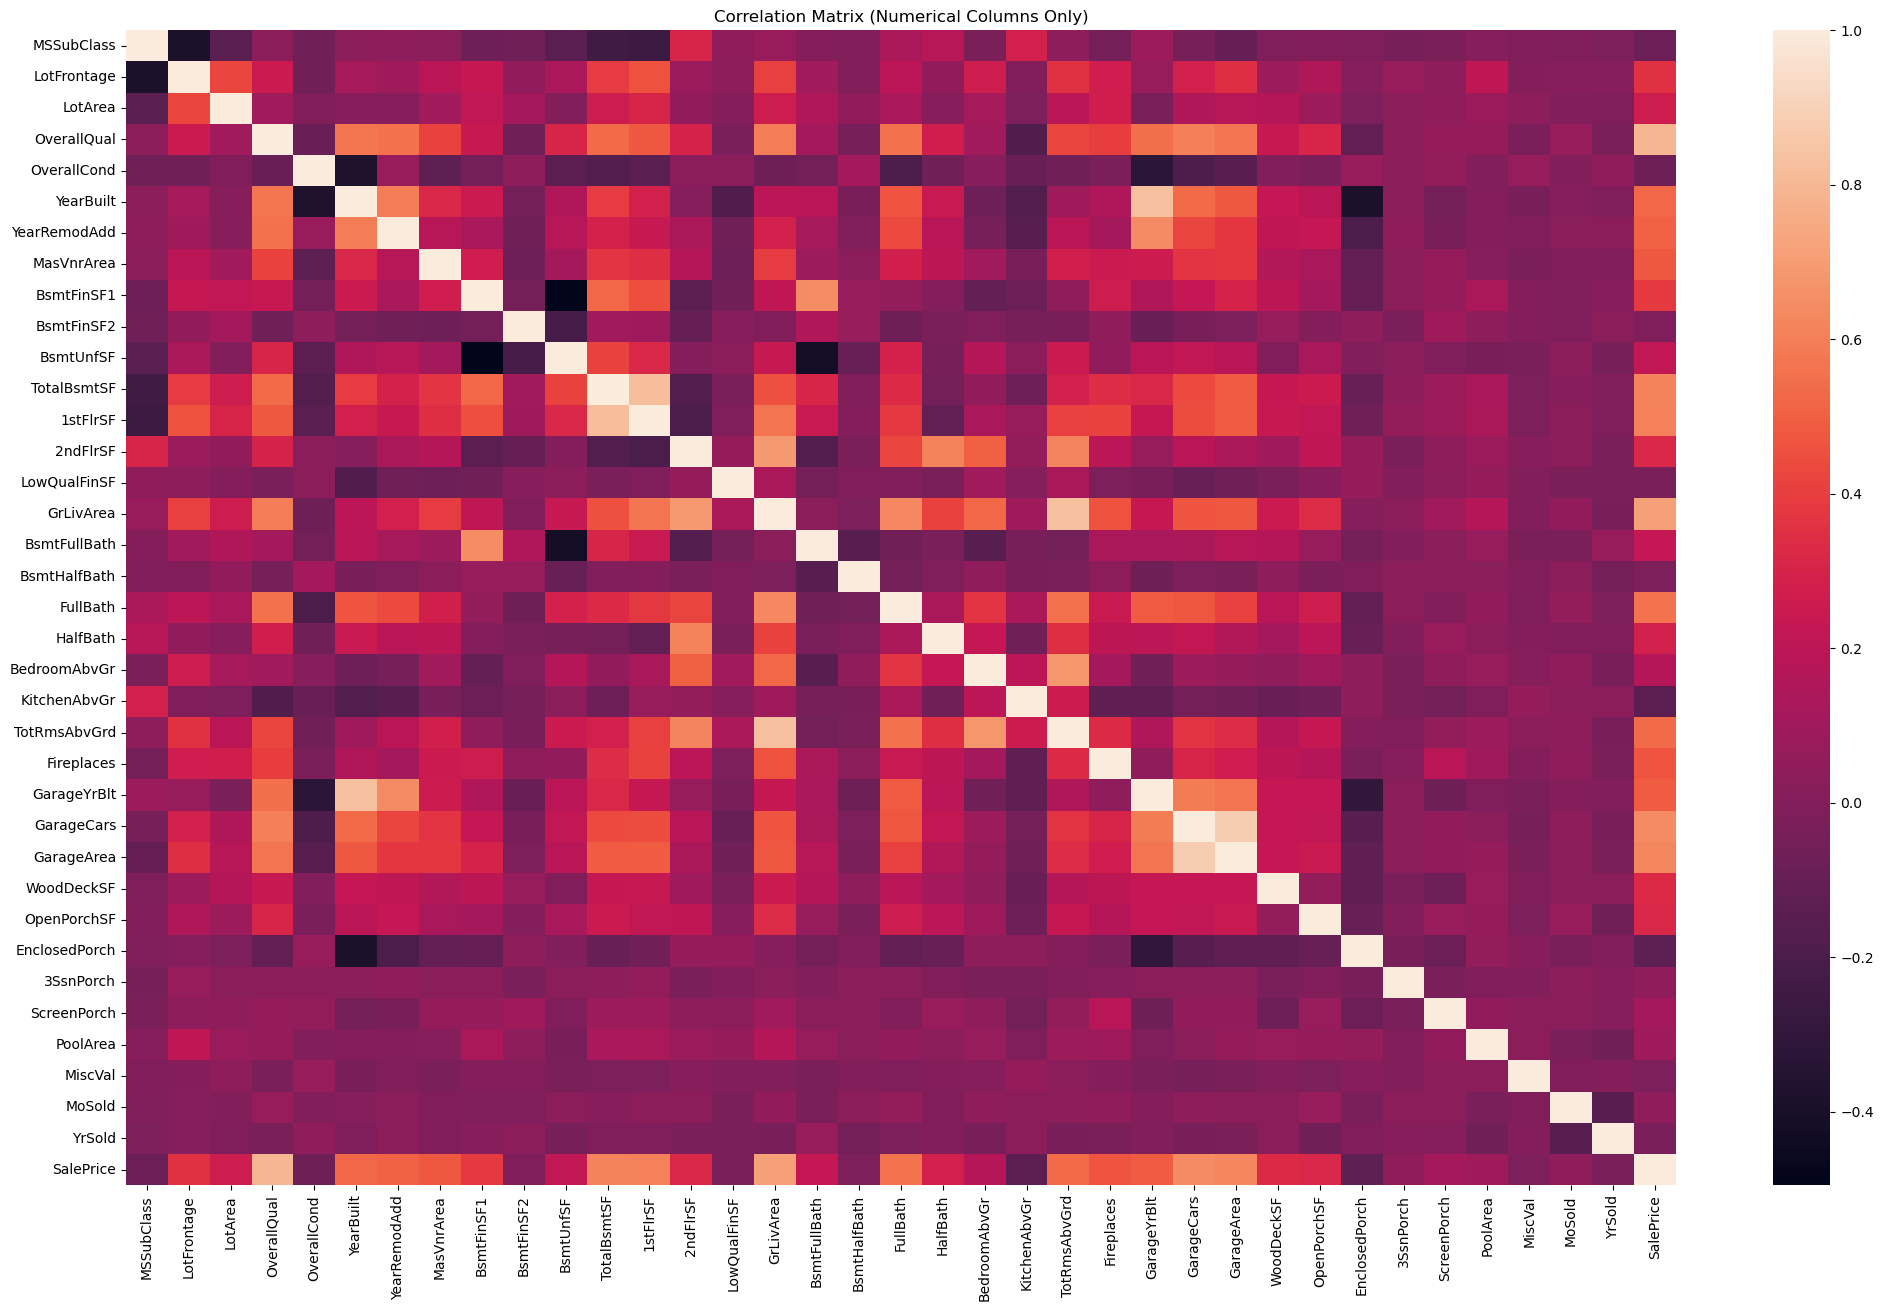

In [211]:
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix)
plt.title("Correlation Matrix (Numerical Columns Only)")
plt.show()

Text(0.5, 1.0, 'Relationship between Masonry Veneer Area and Sale Price')

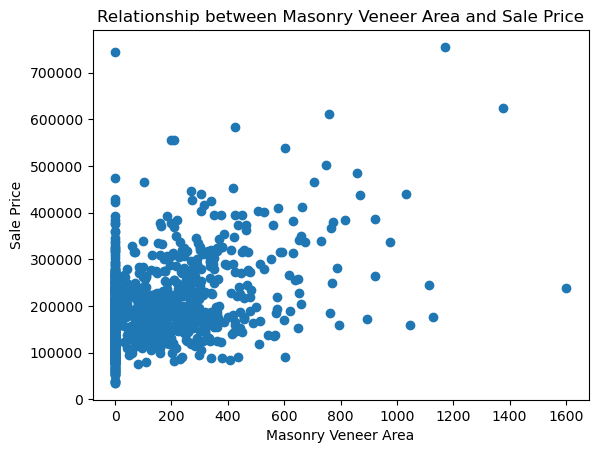

In [37]:
# Scatter plot between MasVnrArea and SalePrice
plt.scatter(df.MasVnrArea, df.SalePrice)
plt.xlabel("Masonry Veneer Area")
plt.ylabel("Sale Price")
plt.title("Relationship between Masonry Veneer Area and Sale Price")

Text(0.5, 1.0, 'Relationship betwwen Lot Frontage and Sale Price')

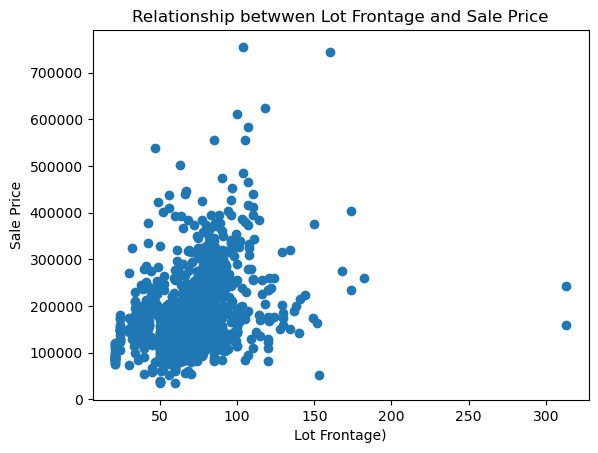

In [39]:
# Scatter plot between LotFrontage and SalePrice
plt.scatter(df.LotFrontage, df.SalePrice)
plt.xlabel("Lot Frontage)")
plt.ylabel("Sale Price")
plt.title("Relationship betwwen Lot Frontage and Sale Price")

Text(0.5, 1.0, 'Relationship betwwen Lot Area and Sale Price')

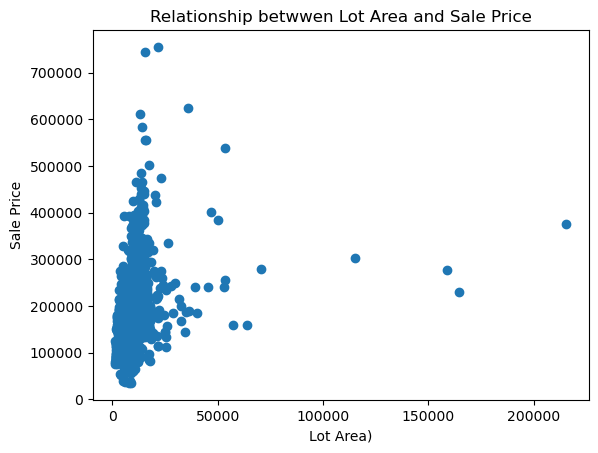

In [133]:
# Scatter plot between LotArea and SalePrice
plt.scatter(df.LotArea, df.SalePrice)
plt.xlabel("Lot Area)")
plt.ylabel("Sale Price")
plt.title("Relationship betwwen Lot Area and Sale Price")

Text(0.5, 1.0, 'Relationship betwwen Overall Condition and Sale Price')

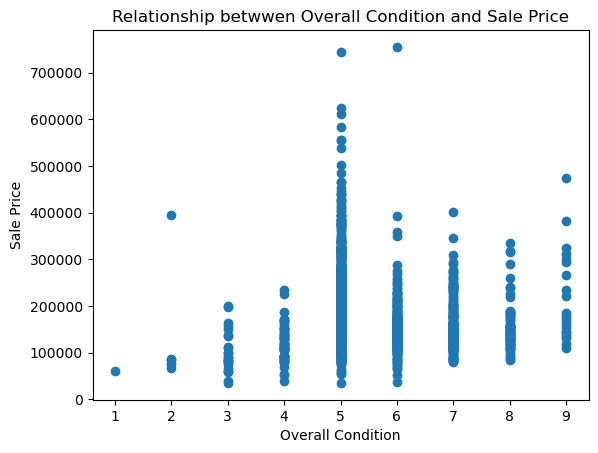

In [135]:
# Scatter plot between OverallCond and SalePrice
plt.scatter(df.OverallCond, df.SalePrice)
plt.xlabel("Overall Condition")
plt.ylabel("Sale Price")
plt.title("Relationship betwwen Overall Condition and Sale Price")

Text(0.5, 1.0, 'Relationship betwwen Ground Living Area and Sale Price')

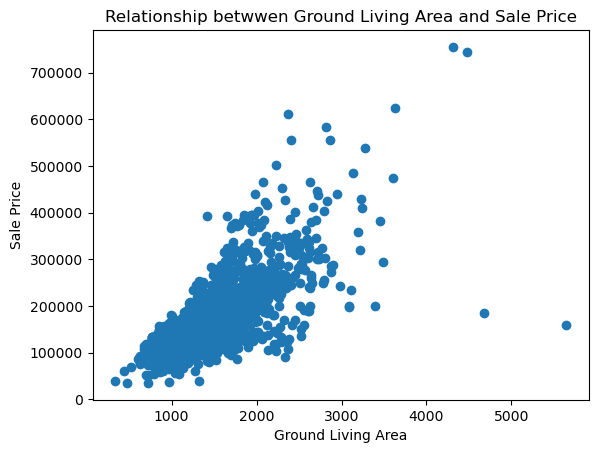

In [137]:
# Scatter plot between GrLivArea and SalePrice
plt.scatter(df.GrLivArea, df.SalePrice)
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price")
plt.title("Relationship betwwen Ground Living Area and Sale Price")

Text(0.5, 1.0, 'Relationship betwwen Full Bath and Sale Price')

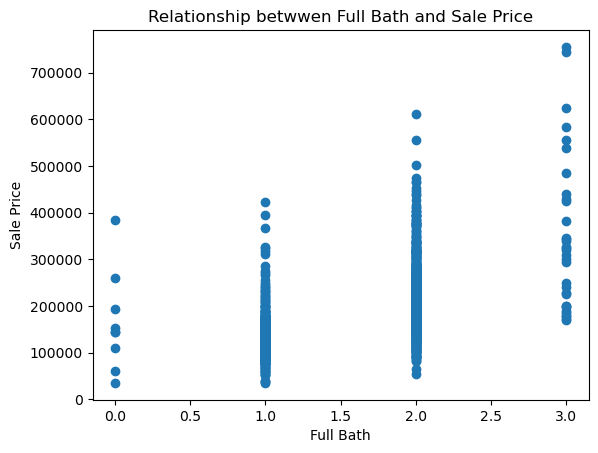

In [139]:
# Scatter plot between Full Bath and SalePrice
plt.scatter(df.FullBath, df.SalePrice)
plt.xlabel("Full Bath")
plt.ylabel("Sale Price")
plt.title("Relationship betwwen Full Bath and Sale Price")

Text(0.5, 1.0, 'Relationship betwwen Garage Area and Sale Price')

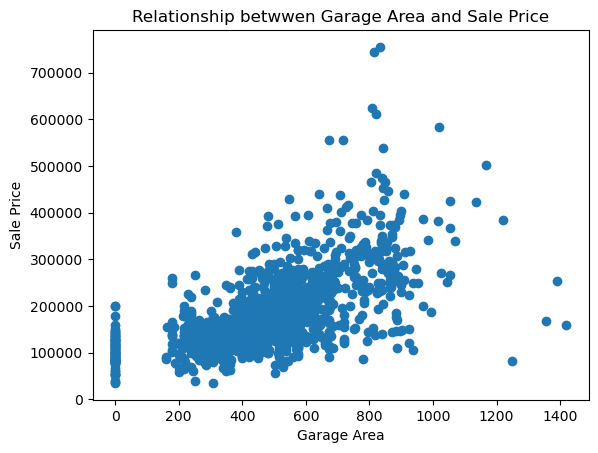

In [123]:
# Scatter plot between GarageArea and SalePrice
plt.scatter(df.GarageArea, df.SalePrice)
plt.xlabel("Garage Area")
plt.ylabel("Sale Price")
plt.title("Relationship betwwen Garage Area and Sale Price")

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

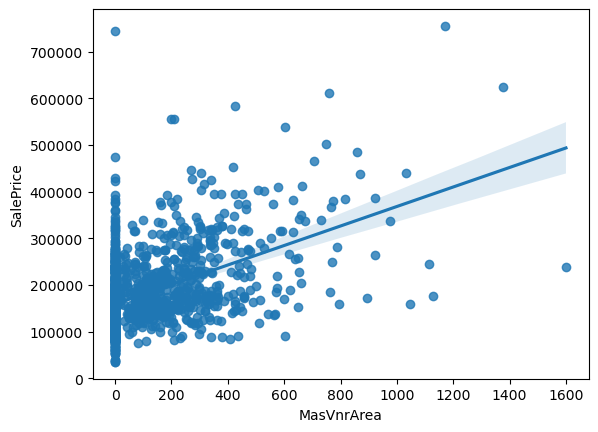

In [117]:
sns.regplot(y="SalePrice", x="MasVnrArea", data=df, fit_reg = True)

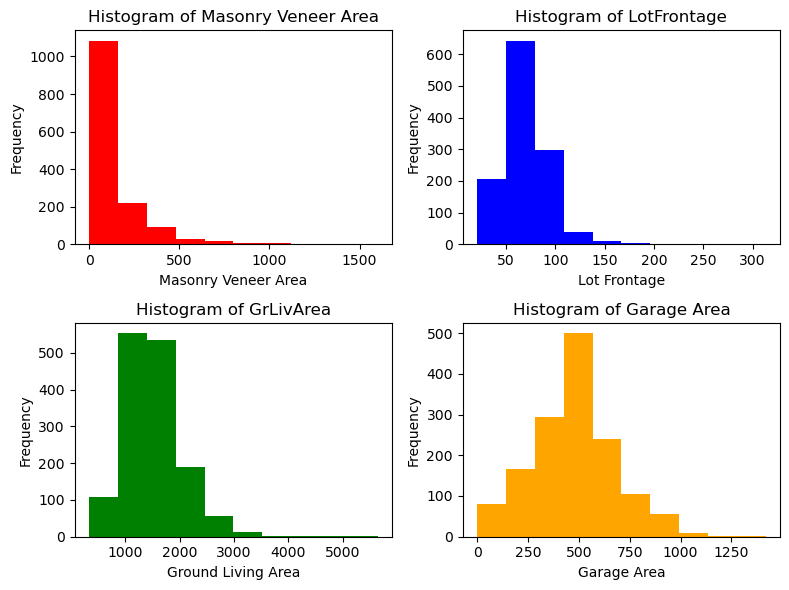

In [41]:
# Histograms of dependent variables.
plt.figure(figsize=(8, 6))
           
plt.subplot(2, 2, 1)
plt.hist(df.MasVnrArea, bins=10, color='red')
plt.xlabel('Masonry Veneer Area')
plt.ylabel('Frequency')
plt.title('Histogram of Masonry Veneer Area')

plt.subplot(2, 2, 2)
plt.hist(df.LotFrontage, bins=10, color='blue')
plt.xlabel('Lot Frontage')
plt.ylabel('Frequency')
plt.title('Histogram of LotFrontage')

plt.subplot(2, 2, 3)
plt.hist(df.GrLivArea, bins=10, color='green')
plt.xlabel('Ground Living Area')
plt.ylabel('Frequency')
plt.title('Histogram of GrLivArea')

plt.subplot(2, 2, 4)
plt.hist(df.GarageArea, bins=10, color='orange')
plt.xlabel('Garage Area')
plt.ylabel('Frequency')
plt.title('Histogram of Garage Area')

plt.tight_layout()
plt.show()

In [ ]:
H_1 = "There is a correlation between Sale Price and Masonry Veneer Area."

H_0 = "There is a no correlation between Sale Price and Masonry Veneer Area."

In [43]:
from scipy.stats import pearsonr

x = df['MasVnrArea']
y = df['SalePrice']

r, p_value = pearsonr(x, y)

print(f"Pearson correlation coefficient: {r:.2f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.48
P-value: 0.000


In [49]:

x = df['GrLivArea']
y = df['SalePrice']

r, p_value = pearsonr(x, y)

print(f"Pearson correlation coefficient: {r:.2f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.33
P-value: 0.000


In [57]:
x = df['LotFrontage']
y = df['SalePrice']

r, p_value = pearsonr(x, y)

print(f"Pearson correlation coefficient: {r:.2f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.33
P-value: 0.000


In [59]:
x = df['GarageArea']
y = df['SalePrice']

r, p_value = pearsonr(x, y)

print(f"Pearson correlation coefficient: {r:.2f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.62
P-value: 0.000


In [65]:
# Import statsmodel
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [67]:
# 
m = ols('SalePrice ~ MasVnrArea',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     425.4
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           3.92e-83
Time:                        19:34:10   Log-Likelihood:                -18357.
No. Observations:                1460   AIC:                         3.672e+04
Df Residuals:                    1458   BIC:                         3.673e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.592e+05   2110.347     75.458      0.0

In [69]:
m = ols('SalePrice ~ GarageArea',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     927.0
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          5.27e-158
Time:                        19:34:12   Log-Likelihood:                -18185.
No. Observations:                1460   AIC:                         3.637e+04
Df Residuals:                    1458   BIC:                         3.638e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.136e+04   3949.003     18.070      0.0